In [1]:
# Victor Z
# UW-Madison, 2024
# Illustrate uncertainty quantification capabilities of GP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(0)  # For reproducibility

xlb = -1
xub = 1

def plot_gp(xobs, yobs, xlb, xub, subplot_index):
    kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.01**2)
    gpr.fit(xobs, yobs)
    x = np.linspace(xlb, xub, 1000).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x, return_std=True)

    plt.subplot(2, 2, subplot_index)
    plt.scatter(xobs, yobs, edgecolor='black', facecolor='white', s=80, linewidth=1.5)
    plt.plot(x, y_pred, '--k', linewidth=1.5)
    plt.fill_between(x.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='k', alpha=0.1)
    plt.xlim([xlb, xub])
    plt.ylim([-0.5, 1.5])
    plt.grid(True)
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$y$', fontsize=12)


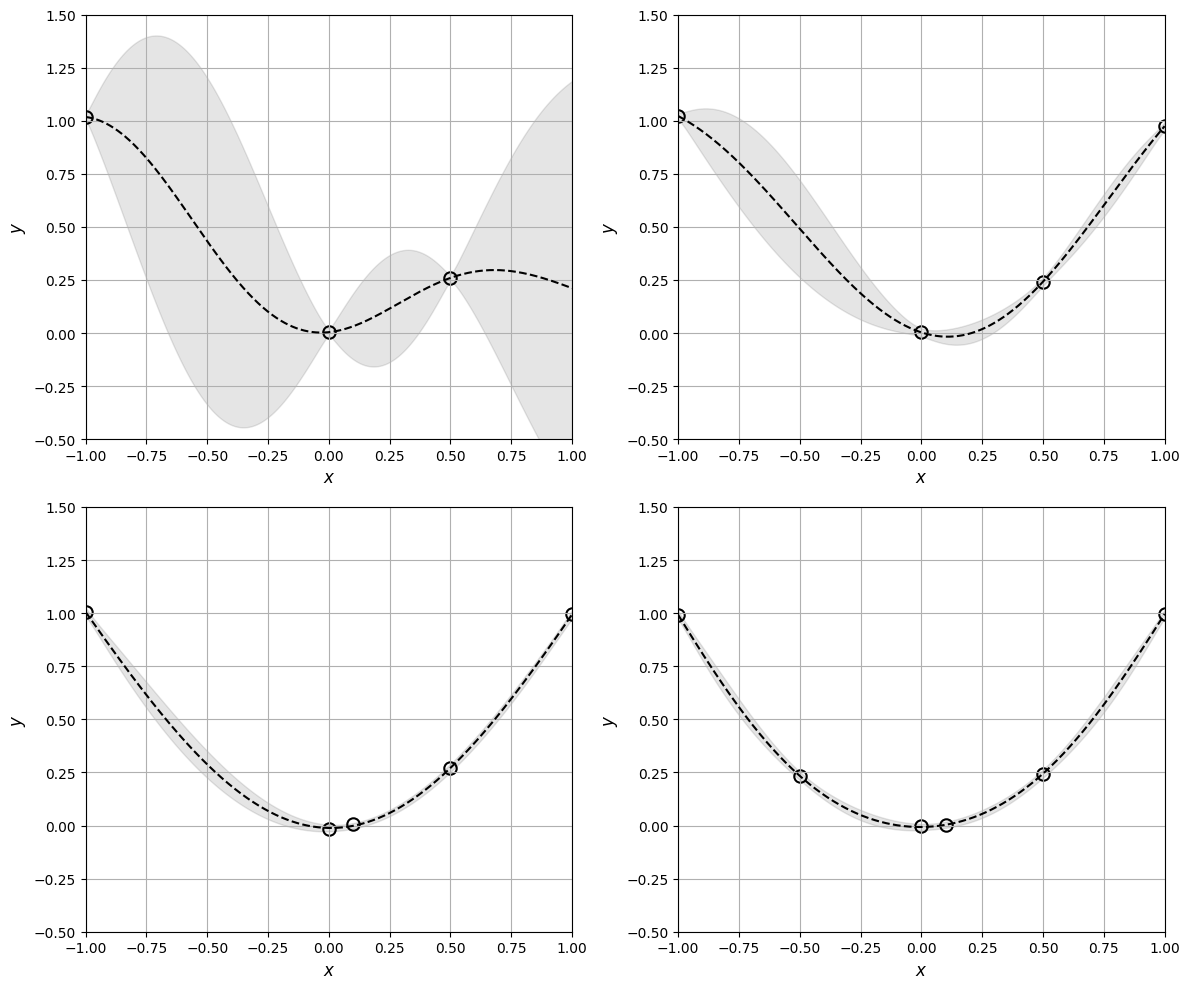

In [2]:
# 3 data points
xobs = np.array([-1, 0, 0.5]).reshape(-1, 1)
yobs = xobs**2 + 0.01 * np.random.randn(*xobs.shape)
plt.figure(figsize=(12, 10))
plot_gp(xobs, yobs, xlb, xub, 1)

# 4 data points
xobs = np.array([-1, 0, 0.5, 1]).reshape(-1, 1)
yobs = xobs**2 + 0.01 * np.random.randn(*xobs.shape)
plot_gp(xobs, yobs, xlb, xub, 2)

# 5 data points
xobs = np.array([-1, 0, 0.5, 1, 0.1]).reshape(-1, 1)
yobs = xobs**2 + 0.01 * np.random.randn(*xobs.shape)
plot_gp(xobs, yobs, xlb, xub, 3)

# 6 data points
xobs = np.array([-1, 0, 0.5, 1, 0.1, -0.5]).reshape(-1, 1)
yobs = xobs**2 + 0.01 * np.random.randn(*xobs.shape)
plot_gp(xobs, yobs, xlb, xub, 4)

plt.tight_layout()
plt.show()